# Interception

In [1]:
import numpy as np
from sympy import *
x, y, z, t = symbols('x y z t')

import matplotlib.pyplot as plt

In [2]:
# incoming projectile A
rAi = [0, 3]
vAi = [8*cos(40*pi/180).n(), 8*sin(40*pi/180).n()]

# intercepting projectile B
rBi = [10, 0]
angleB = (180-50)*pi/180   # in radians; relative to positive x-axis



In [3]:
rAi, vAi

([0, 3], [6.12835554495182, 5.14230087749231])

In [ ]:
def calculate_speed(rAi, vAi, rBi, angleB):
    """
    Calculate the speed of the inercepting projectile B.
    """
    pass



In [4]:
def motion_step(ri, vi, a, tstep=0.01):
    """
    Calculate vf from vi + \int a, and rf from r + \int v.
    """
    vf = vi + a*tstep
    rf = ri + vi*tstep + 0.5*a*tstep**2
    return [rf, vf]

    
def motion(ri, vi, a=[0,-9.81], ti=0, tf=1.0, tstep=0.001):
    """
    Compute the motion of an object with initial position ri (2d vector),
    initial velocity vi (2d vector), and acceleration 
    undergoing acceleration `a` (2d vector), between `ti` and `tf`.
    Returns times (list) and trajectory (list)  [`r(ti)`, ... , `r(tf)`].
    """
    ri, vi, a = np.array(ri), np.array(vi), np.array(a)
    times = []
    trajectory = []  # list of positions (2d vectors)

    # t = ti
    trajectory.append(ri)
    rt, vt = ri, vi
    
    # t > ti
    for t in np.arange(ti+tstep, tf, tstep):
        rt, vt = motion_step(rt, vt, a=a, tstep=tstep)
        trajectory.append(rt)
        
    return times, trajectory
    

In [5]:
t, trajA = motion(rAi, vAi, tf=2)

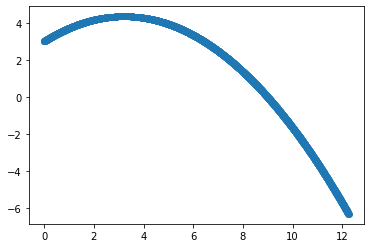

In [6]:
xA, yA = zip(*trajA)
plt.scatter(xA, yA)

In [14]:
from IPython.display import HTML
from matplotlib.animation import FuncAnimation
import numpy as np

t = np.linspace(0, 2*np.pi)
x = np.sin(t)

fig, ax = plt.subplots()
ax.axis([0,2*np.pi,-1,1])
l, = ax.plot([],[])

def animate(i):
    l.set_data(t[:i], x[:i])

ani = FuncAnimation(fig, animate, frames=len(t), interval=50)
plt.close()

HTML(ani.to_jshtml())